# N-body animation

This notebook loads the position data from the accompanying simulation notebook and allows for 2D or 3D plotting.

Contents:

[2D animation](#2d)

[3D animation](#3d)

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
%matplotlib notebook

def csv_to_list_of_lists(datafile):
    '''This function takes in a csv file and loads it into a list of lists'''
    #datafile is a csv file where each column is the x, y, and z coordinates of each of the bodies; [1x,1y,1z,2x,2y,2z,...]
    f = open(datafile, 'r')
    read = csv.reader(f, delimiter=',')
    n_bodies_data = list(zip(*read))
    n_bodies_data = [list(map(float, sublist)) for sublist in n_bodies_data]
    return n_bodies_data

def csv_to_list_of_lists_xy(datafile):
    n = csv_to_list_of_lists(datafile)
    del n[2::3]
    return n

#Calculate how many lines in the csv file, which is to say, number of time steps of the simulation
f = open('positions.csv','r')
read = csv.reader(f, delimiter=',')
counter = 0
for line in read:
    counter += 1
print(counter)

367


## 2D Plotting <a id='2d'></a>

<IPython.core.display.Javascript object>


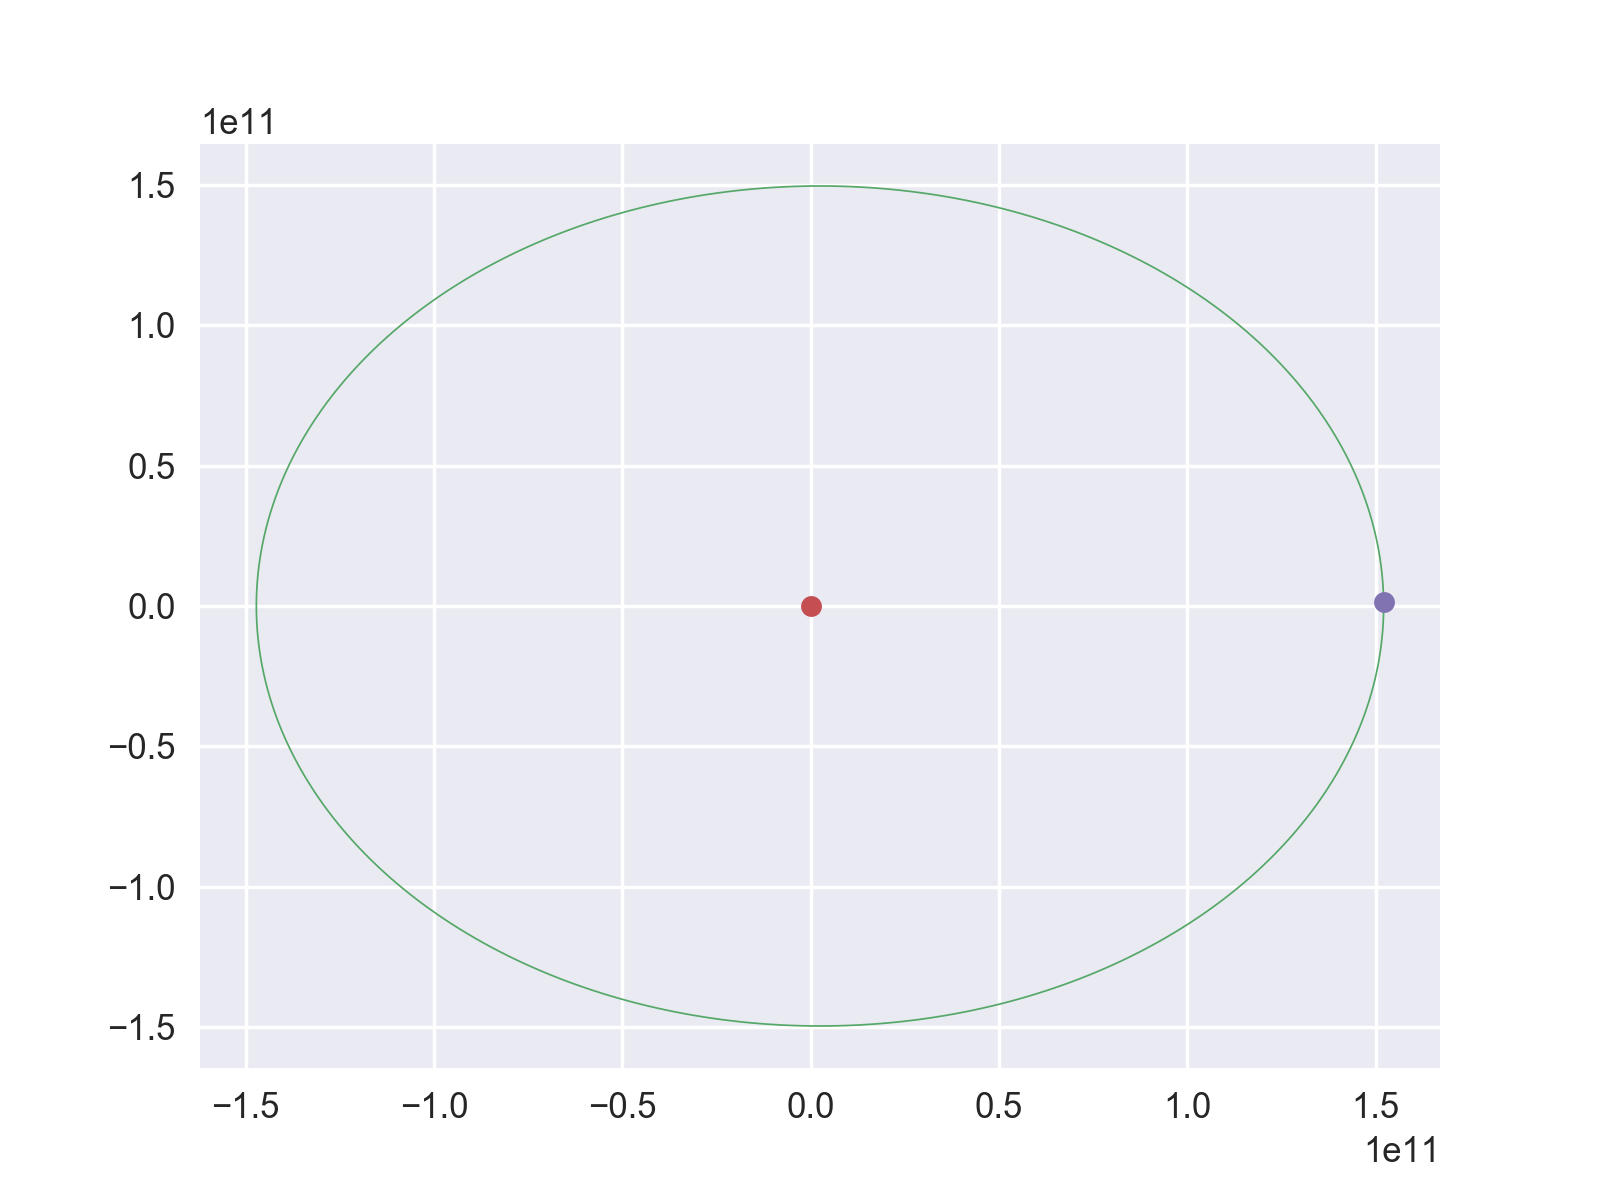

In [9]:
%matplotlib notebook
n_bodies_data = csv_to_list_of_lists_xy('positions.csv')

fig = plt.figure()
plt.style.use('seaborn')
x_lists, y_lists = n_bodies_data[::2], n_bodies_data[1::2]
n = len(x_lists)
x_low, x_high = min([min(x_lists[i]) for i in range(n)]), max([max(x_lists[i]) for i in range(n)])
y_low, y_high = min([min(y_lists[i]) for i in range(n)]), max([max(y_lists[i]) for i in range(n)])
x_margin, y_margin = (x_high-x_low)*0.05, (y_high-y_low)*0.05
xlim=(x_low-x_margin, x_high+x_margin)
ylim=(y_low-y_margin, y_high+y_margin)
ax = plt.axes(xlim=xlim, ylim=ylim)
for i in range(n):
    ax.plot(x_lists[i],y_lists[i],lw=0.5)

lines = []
for i in range(n):
    line, = ax.plot([], [], 'o', ms=6)
    lines.append(line,)
    
def animate(i):
    for j in range(n):
        lines[j].set_data(x_lists[j][i],y_lists[j][i])
    return lines

anim = FuncAnimation(fig, animate, frames=8000, interval=3, blit=True)  

plt.show()

## 3D Plotting <a id='3d'></a>

Traceback (most recent call last):
  File "C:\Users\Nick\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Nick\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


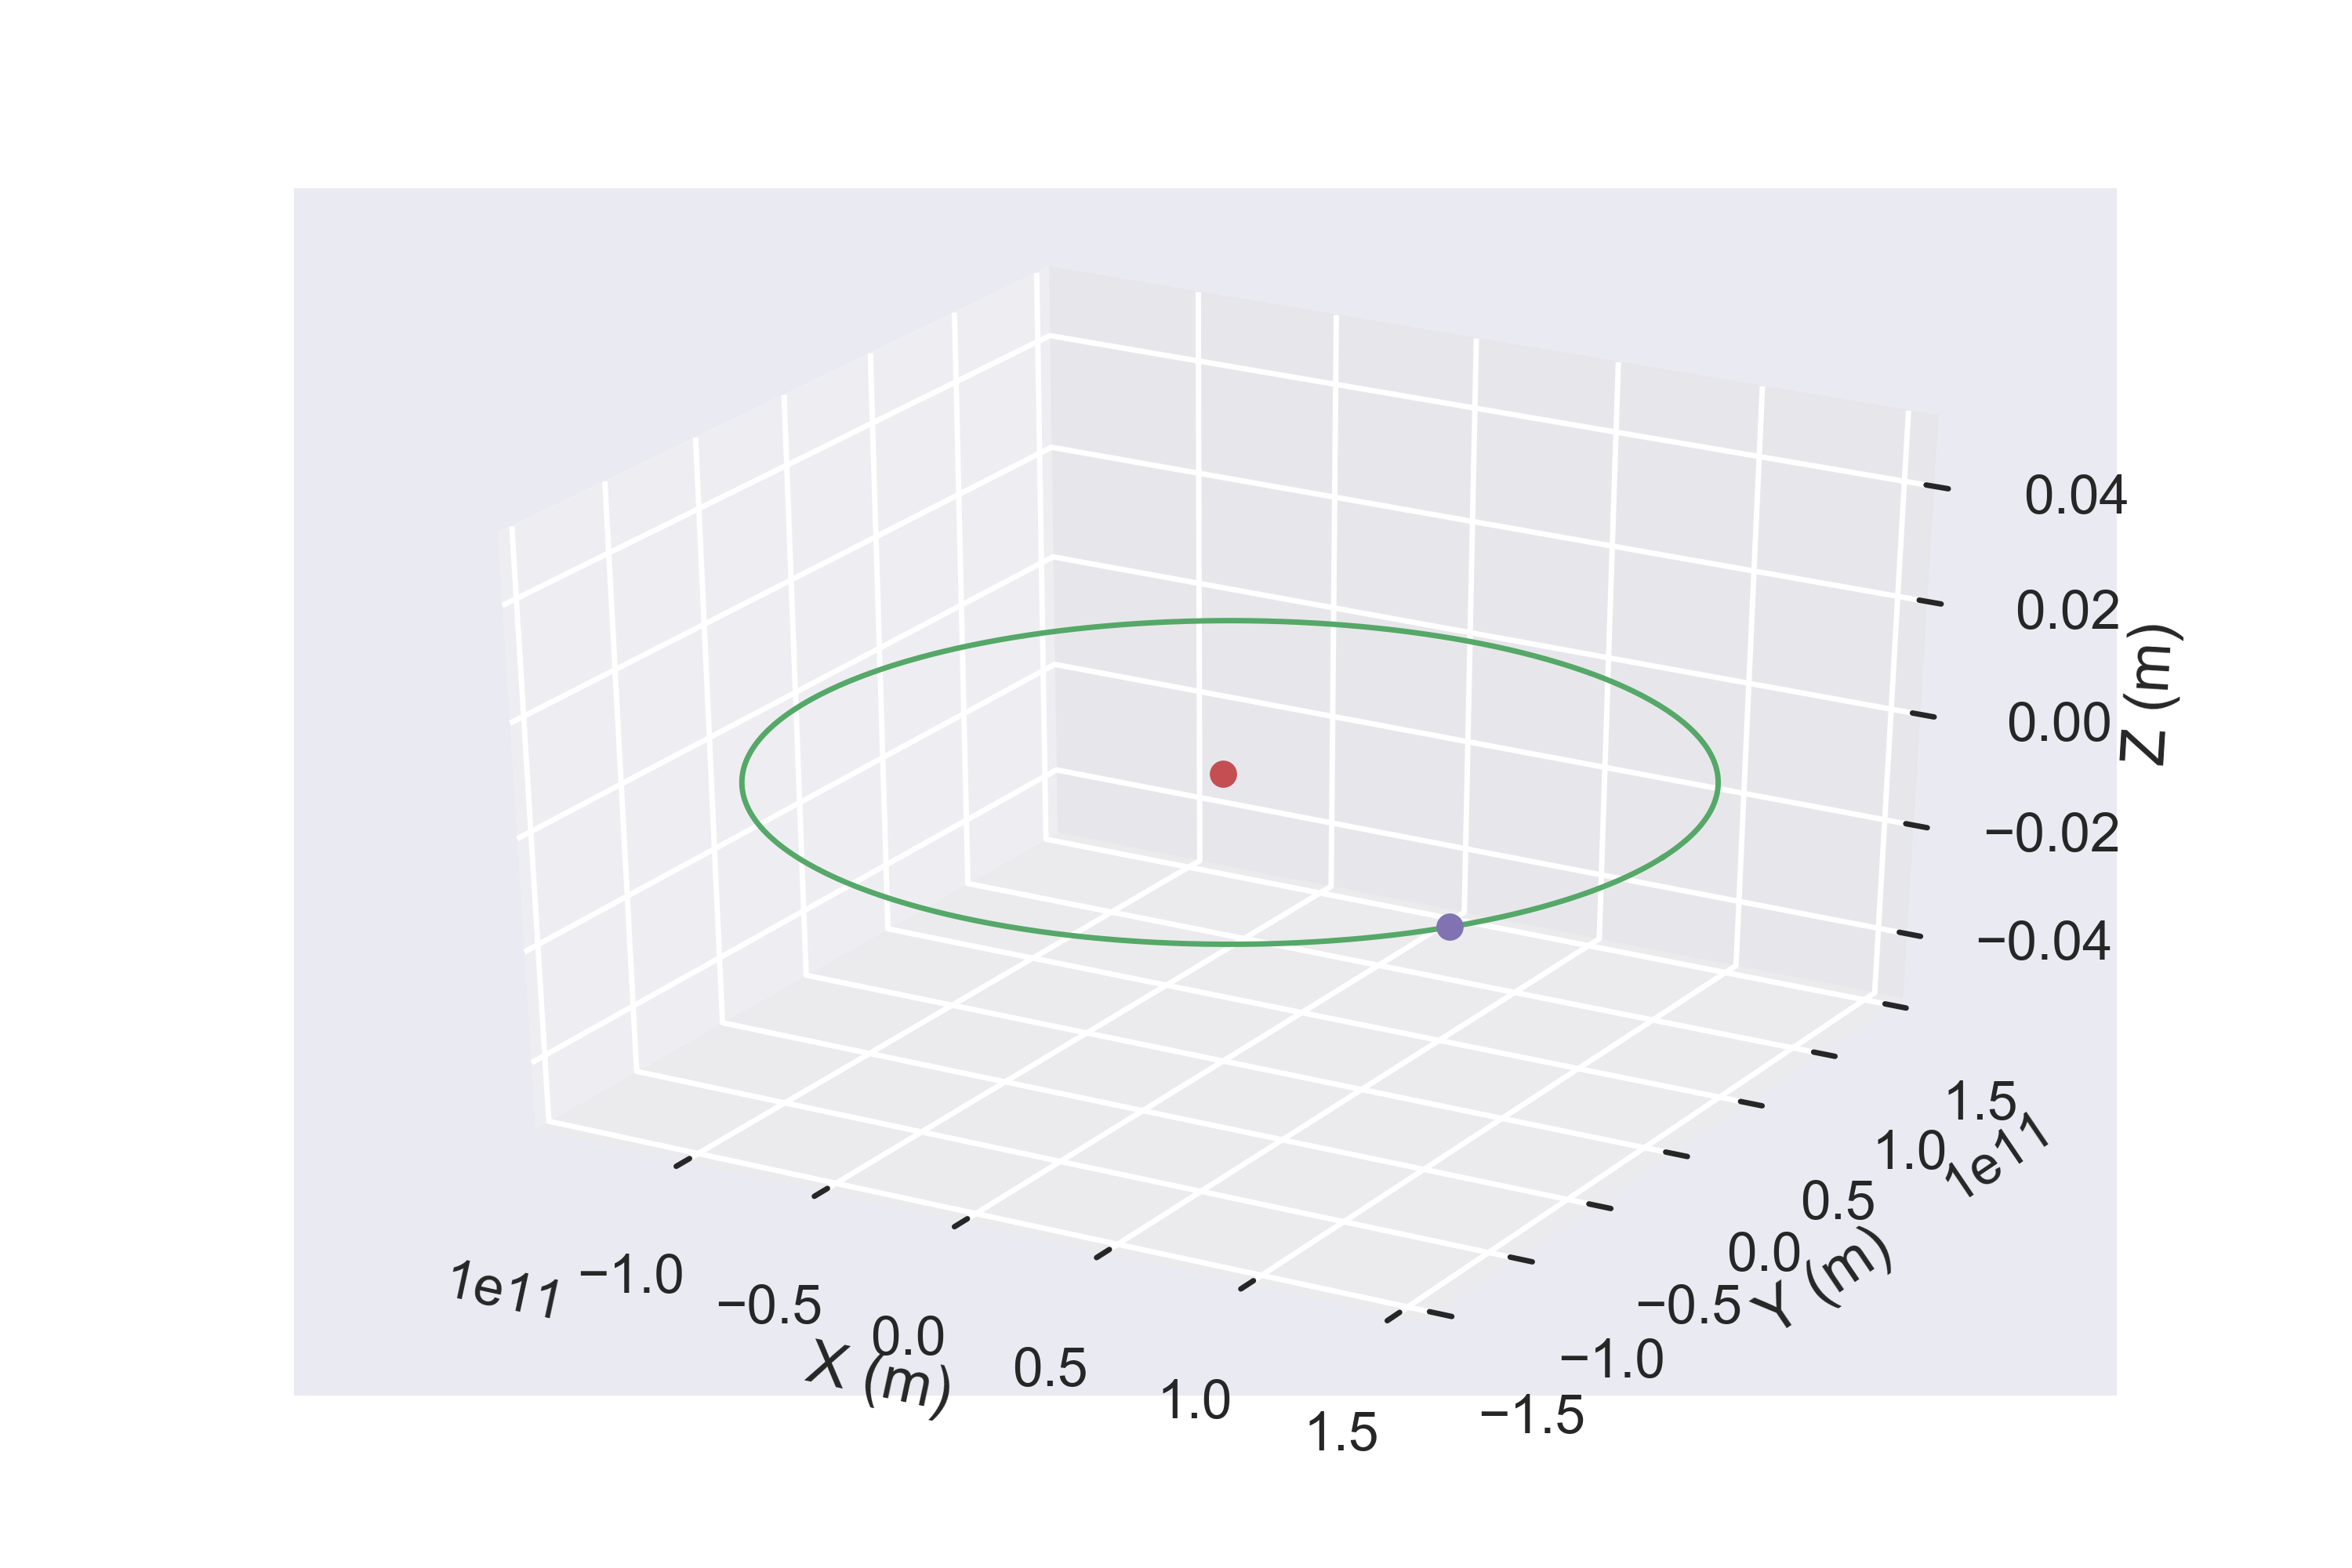

C:\Users\Nick\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


In [10]:
%matplotlib notebook
n_bodies_data = csv_to_list_of_lists('positions.csv')

x_lists, y_lists, z_lists = n_bodies_data[::3], n_bodies_data[1::3], n_bodies_data[2::3]
n = len(x_lists)
x_low, x_high = min([min(x_lists[i]) for i in range(n)]), max([max(x_lists[i]) for i in range(n)])
y_low, y_high = min([min(y_lists[i]) for i in range(n)]), max([max(y_lists[i]) for i in range(n)])
z_low, z_high = min([min(z_lists[i]) for i in range(n)]), max([max(z_lists[i]) for i in range(n)])
xlim=(x_low-abs(x_high*0.01), x_high+abs(x_high*0.01))
ylim=(y_low-abs(y_high*0.01), y_high+abs(y_high*0.01))
zlim=(z_low-abs(z_high*0.01), z_high+abs(z_high*0.01))

fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(projection='3d')

ax.set_xlim3d(xlim)
ax.set_xlabel('X (m)') 

ax.set_ylim3d(ylim)
ax.set_ylabel('Y (m)')

ax.set_zlim3d(zlim)
ax.set_zlabel('Z (m)')

for i in range(n):
    ax.plot(x_lists[i], y_lists[i], z_lists[i], lw=1)

lines = []
for i in range(n):
    line, = ax.plot([], [], [], 'o', ms=5)
    lines.append(line,)

def animate(i):
    for j in range(n):
        lines[j].set_data(np.array(x_lists[j][i]),np.array(y_lists[j][i]))
        lines[j].set_3d_properties(np.array(z_lists[j][i]))
    return lines

#counter in frames arg is from prior cell; only parameter to change is how many time steps to skip between frames
anim = FuncAnimation(fig, animate, frames=list(range(0,counter,10)), interval=50, blit=True)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.show()

#below is an alternative way to save the mp4 file generated above
anim.save('solarsystem.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [ ]:
'''
Sources:

3D Animation — Matplotlib 2.1.2 Documentation
https://matplotlib.org/2.1.2/gallery/animation/simple_3danim.html

Matplotlib Animation Tutorial
https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
'''